In [9]:
using AbstractAlgebra, Random, Permutations
b=2
F = GF(b)
m = 5
s = 2
ρ = m 
t = m - ρ 
N = b^m

32

In [10]:
all_perms = collect(PermGen(m)) 
number_perm = length(all_perms)
@show number_perm
# inds = rand(1:length(all_perms), s)
@show inds = (1,120)
C = [Matrix(all_perms[i]) for i in inds]


number_perm = 120
inds = (1, 120) = (1, 120)


2-element Vector{Matrix{Int64}}:
 [1 0 … 0 0; 0 1 … 0 0; … ; 0 0 … 1 0; 0 0 … 0 1]
 [0 0 … 0 1; 0 0 … 1 0; … ; 0 1 … 0 0; 1 0 … 0 0]

In [11]:
badic = collect(Iterators.product(fill(0:b-1, m)...))[:]

32-element Vector{NTuple{5, Int64}}:
 (0, 0, 0, 0, 0)
 (1, 0, 0, 0, 0)
 (0, 1, 0, 0, 0)
 (1, 1, 0, 0, 0)
 (0, 0, 1, 0, 0)
 (1, 0, 1, 0, 0)
 (0, 1, 1, 0, 0)
 (1, 1, 1, 0, 0)
 (0, 0, 0, 1, 0)
 (1, 0, 0, 1, 0)
 ⋮
 (1, 1, 1, 0, 1)
 (0, 0, 0, 1, 1)
 (1, 0, 0, 1, 1)
 (0, 1, 0, 1, 1)
 (1, 1, 0, 1, 1)
 (0, 0, 1, 1, 1)
 (1, 0, 1, 1, 1)
 (0, 1, 1, 1, 1)
 (1, 1, 1, 1, 1)

In [12]:
function norm_coord(v,b)
    v_1 = 0.0
    bf = float(b)
    for i in eachindex(v)
        v_1 += v[i] * bf^(-i)
    end
    return v_1
end

norm_coord (generic function with 1 method)

In [13]:
using Test
@test norm_coord([1 1 0 1],2) == 13/16

Test Passed

In [14]:
function point_gen(C,n,b)
    v = [norm_coord(c*n,b) for c in C]
    return v
end

point_gen (generic function with 1 method)

In [28]:
function gen_all_points(C,b)
    badic = collect(Iterators.product(fill(0:b-1, m)...))[:]
    pts = [point_gen(C,collect(n),b) for n in badic]
    return pts
end

gen_all_points (generic function with 1 method)

In [29]:
gen_all_points(C,b)

32-element Vector{Vector{Float64}}:
 [0.0, 0.0]
 [0.5, 0.03125]
 [0.25, 0.0625]
 [0.75, 0.09375]
 [0.125, 0.125]
 [0.625, 0.15625]
 [0.375, 0.1875]
 [0.875, 0.21875]
 [0.0625, 0.25]
 [0.5625, 0.28125]
 ⋮
 [0.90625, 0.71875]
 [0.09375, 0.75]
 [0.59375, 0.78125]
 [0.34375, 0.8125]
 [0.84375, 0.84375]
 [0.21875, 0.875]
 [0.71875, 0.90625]
 [0.46875, 0.9375]
 [0.96875, 0.96875]

In [16]:
using CairoMakie
set_theme!(theme_ggplot2())

In [17]:
z = (0.5, 0.5)

(0.5, 0.5)

In [18]:
vol(z) = prod(z)

vol (generic function with 1 method)

In [19]:
@testset begin
    @test vol((0.5,0.5)) == 0.5*0.5
    @test vol((-0.5,0.5)) == -0.5*0.5
    @test vol((0.0,0.5)) == 0.0
end

Test Summary: | Pass  Total  Time
test set      |    3      3  0.3s


Test.DefaultTestSet("test set", Any[], 3, false, false, true, 1.696175170105e9, 1.696175170392e9, false)

In [20]:
vol_h(z, pts) = count( all(p .< z) for p in pts ) / length(pts)

vol_h (generic function with 1 method)

In [21]:
@test vol_h((0.5,0.5), [[0,0],[0.5, 0.03125],[0.25, 0.0625]]) == 2.0 / 3

Test Passed

In [22]:
δ(z,pts) = vol_h(z, pts) - vol(z)

δ (generic function with 1 method)

In [23]:
@test δ((0.5,0.5),[[0,0],[0.5, 0.03125],[0.25, 0.0625]] ) == 2.0 / 3 - (0.5*0.5)

Test Passed

In [25]:
function is_NNLD(c_z, s, pts)
    NNLD = true
    for i in 1:c_z 
        z = rand(s)
        if δ(z,pts) < 0
            @show z
            NNLD = false
            break
        end
    end
    return NNLD
end


is_NNLD (generic function with 1 method)

In [31]:
pts = gen_all_points(C,b)
is_NNLD(50, 2, pts)


true

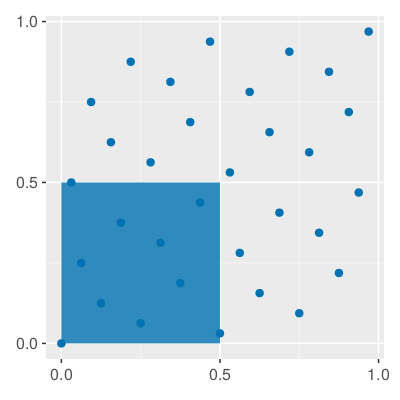

In [75]:
fig = Figure(resolution = (400, 400))
ax = Axis(fig[1,1])
scatter!( Point2.(pts) )
poly!( Rect(0.0, 0, z[1], z[2]))
fig

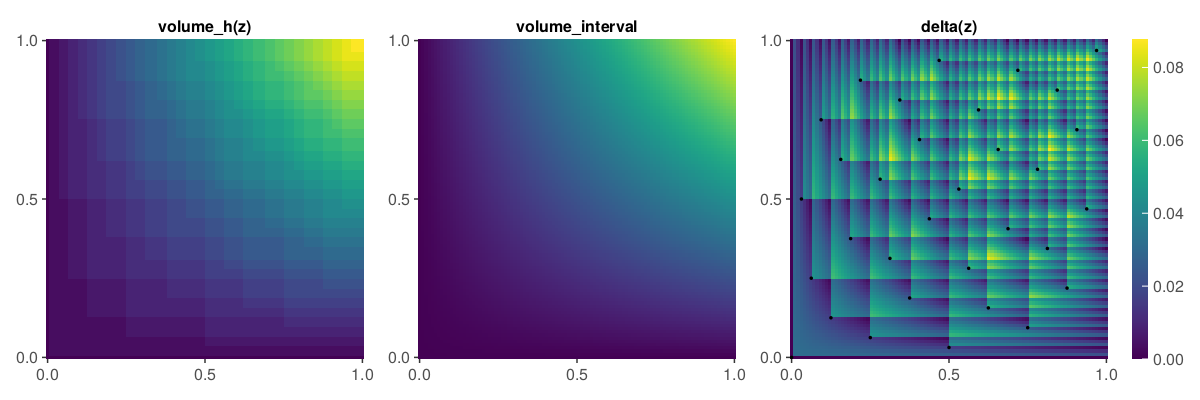

In [57]:
x = LinRange(0,1,100)
y = LinRange(0,1,100)
fig = Figure(resolution = (1200, 400))
ax = Axis(fig[1,1], title="volume_h(z)")
A = [vol_h((a,b),pts[1:end]) for a in x, b in y]
heatmap!(x,y, A )

ax = Axis(fig[1,2], title = "volume_interval")
B = [a*b for a in x, b in y]
heatmap!(x,y, B )

ax = Axis(fig[1,3], title = "delta(z)")
hm = heatmap!(x,y, A-B )
scatter!( Point2.(pts), color = :black, markersize = 5 )
Colorbar(fig[1,4], hm)
fig


In [ ]:
# X_i    =~    U = Uniform([0,1]^d)
# U_1, .... U_N  ∈ U 

# A) E[ "X_i in [0, z)" ] ? ≈ 1/N ∑_i "X_i in [0, z)"
# B) E[ "U_i in [0, z)" ]   = 1/N ∑_i E[  "U_i in [0, z)" ]  -> 1/N * N * vol( [0,z))

# P("U_i in [a,b]") := vol([a,b]) / vol([0,1]^d)
# P("U_i in [0, z)") = vol([0,z))

# Ctrl + /